In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import numpy as np

# DataFrameの作成

In [3]:
# dir path that has image data
dir_path = pathlib.Path('../data/dish')
dir_path_abs = dir_path.resolve()
label_path = pathlib.Path('../data/dish/clf_train_master.tsv').resolve()

In [4]:
# make table of label
label_df = pd.read_csv(label_path, delimiter='\t')
label_df.head(n=5)

,file_name,category_id
0,train_0.jpg,4
1,train_1.jpg,21
2,train_2.jpg,16
3,train_3.jpg,20
4,train_4.jpg,24


In [5]:
# label
cat_id_path = pathlib.Path("../data/dish/clf_category_master.tsv")
cat_df = pd.read_csv(cat_id_path, delimiter='\t')
cat_df.head()

,category_name,category_id
0,bread_sandwich,0
1,bread_sliced,1
2,bread_sweets,2
3,bread_table,3
4,noodle_somen,4


In [6]:
tmp = dict(cat_df.values)
tmp = {v:k for k, v in tmp.items()}
label_df["category_name"] = label_df["category_id"].map(tmp)

# Store the path to the image in the array.
image_paths = []
for image_path in dir_path_abs.glob("clf_train_images_labeled*/*.jpg"):
    image_paths.append(image_path)
# sort path
image_paths.sort(key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))

# concat image_paths with label_df
df = pd.concat((label_df, pd.Series(image_paths)),axis=1)

# change columns
columns = list(df.columns)
columns[-1] = "file path"
df.columns = columns
df.head()

,file_name,category_id,category_name,file path
0,train_0.jpg,4,noodle_somen,/home/yohei/Documents/tlab/data/dish/clf_train...
1,train_1.jpg,21,sweets_muffin,/home/yohei/Documents/tlab/data/dish/clf_train...
2,train_2.jpg,16,rice_sushi,/home/yohei/Documents/tlab/data/dish/clf_train...
3,train_3.jpg,20,sweets_cookie,/home/yohei/Documents/tlab/data/dish/clf_train...
4,train_4.jpg,24,sweets_pudding,/home/yohei/Documents/tlab/data/dish/clf_train...


# center cropを行う

画像の縦横の長さが短い方を基準とし，　真ん中に合わせて切り取る．

例. <br>
    shape=(1024, 512) => shape=(512, 512)となるように真ん中を切り取る

In [24]:
image = cv2.imread(str(df["file path"][2]))

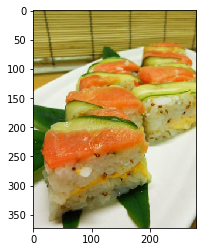

In [25]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [26]:
image.shape

(373, 280, 3)

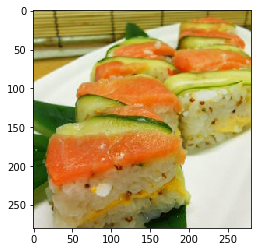

In [27]:
length, width, _ = image.shape
if length < width:
    shape = (length, length)
    c_image = image[:, int(width/2- length/2): int(width/2 + length/2) , :]
else:
    shape = (width, width)
    c_image = image[int(length/2 - width/2): int(length/2 + width/2), : , :]
plt.imshow(cv2.cvtColor(c_image, cv2.COLOR_BGR2RGB))

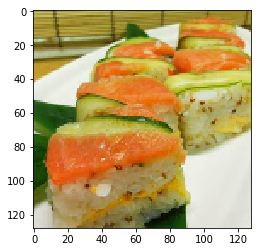

In [30]:
plt.imshow(cv2.resize(cv2.cvtColor(c_image, cv2.COLOR_BGR2RGB),
                      dsize=(128, 128), interpolation=cv2.INTER_CUBIC))

In [ ]:
plt.imshow(cv2.resize(cv2.cvtColor(c_image, cv2.COLOR_BGR2RGB),
                      dsize=(64, 64), interpolation=cv2.INTER_CUBIC))

# center crop

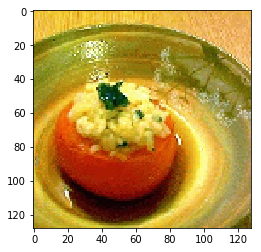

In [35]:
# labelありデータ(10000枚)に対して

# dir path that has image data
dir_path = pathlib.Path('../data/dish')
dir_path_abs = dir_path.resolve()
# path to dir to save
save_path = pathlib.Path(".") / "center_crop_data_128"
save_path_abs = save_path.resolve()

shape=(128, 128)
if not save_path_abs.exists():
    save_path_abs.mkdir()
for path in dir_path_abs.glob("clf_train_images_labeled_*/*.jpg"):
    image = cv2.imread(str(path))
    length, width, _ = image.shape
    if length < width:
        c_image = image[:, int(width/2- length/2): int(width/2 + length/2) , :]
    else:
        c_image = image[int(length/2 - width/2): int(length/2 + width/2), : , :]
    r_img = cv2.resize(c_image, dsize=shape, interpolation=cv2.INTER_CUBIC)
    tmp = pathlib.Path(str(save_path_abs / path.parts[-1]))
    cv2.imwrite(str(tmp), r_img)

plt.imshow(cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB))

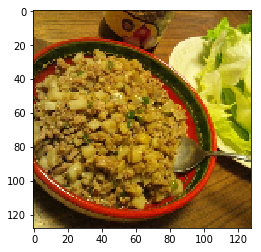

In [36]:
# labelなしデータ(50000枚)に対して

# dir path that has image data
dir_path = pathlib.Path('../data/dish')
dir_path_abs = dir_path.resolve()
# path to dir to save
save_path = pathlib.Path(".") / "unlabeled_center_crop_data_128"
save_path_abs = save_path.resolve()

shape=(128, 128)
if not save_path_abs.exists():
    save_path_abs.mkdir()
for path in dir_path_abs.glob("clf_train_images_unlabeled_*/*.jpg"):
    image = cv2.imread(str(path))
    length, width, _ = image.shape
    if length < width:
        c_image = image[:, int(width/2- length/2): int(width/2 + length/2) , :]
    else:
        c_image = image[int(length/2 - width/2): int(length/2 + width/2), : , :]
    r_img = cv2.resize(c_image, dsize=shape, interpolation=cv2.INTER_CUBIC)
    tmp = pathlib.Path(str(save_path_abs / path.parts[-1]))
    cv2.imwrite(str(tmp), r_img)

plt.imshow(cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB))

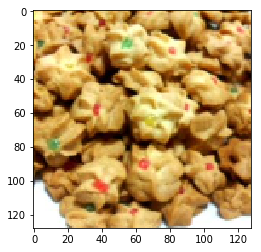

In [37]:
# テストデータ(10000枚)に対して

# dir path that has image data
dir_path = pathlib.Path('../data/dish')
dir_path_abs = dir_path.resolve()
# path to dir to save
save_path = pathlib.Path(".") / "test_center_crop_data_128"
save_path_abs = save_path.resolve()

shape=(128, 128)
if not save_path_abs.exists():
    save_path_abs.mkdir()
for path in dir_path_abs.glob("clf_test_images_*/*.jpg"):
    image = cv2.imread(str(path))
    length, width, _ = image.shape
    if length < width:
        c_image = image[:, int(width/2- length/2): int(width/2 + length/2) , :]
    else:
        c_image = image[int(length/2 - width/2): int(length/2 + width/2), : , :]
    r_img = cv2.resize(c_image, dsize=shape, interpolation=cv2.INTER_CUBIC)
    tmp = pathlib.Path(str(save_path_abs / path.parts[-1]))
    cv2.imwrite(str(tmp), r_img)

plt.imshow(cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB))